In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

589

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | upington
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | egvekinot
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of

Processing Record 38 of Set 4 | nohar
Processing Record 39 of Set 4 | witu
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | oytal
Processing Record 42 of Set 4 | lee
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | sagua la grande
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | aranos
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | dondo
Processing Record 1 of Set 5 | yerbogachen
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | cortez
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | kamenka
Processing Record 9 of Set 5 | milkovo
Processing Record 10 of Set 5 | esil
Processing Record 11 of Set 5 | taoudenni
Processing Record 12 of Set 5 | umz

Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | fortuna
Processing Record 27 of Set 8 | yeppoon
Processing Record 28 of Set 8 | nguiu
City not found. Skipping...
Processing Record 29 of Set 8 | northam
Processing Record 30 of Set 8 | kapoeta
Processing Record 31 of Set 8 | lewisporte
Processing Record 32 of Set 8 | saint-jean-de-luz
Processing Record 33 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | thompson
Processing Record 36 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 8 | alamosa
Processing Record 38 of Set 8 | bundaberg
Processing Record 39 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 40 of Set 8 | canico
Processing Record 41 of Set 8 | svetlaya
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | robertsport
Processing Record 44 of Set 8 | jahrom
City not found. Skipping...
P

Processing Record 11 of Set 12 | capreol
Processing Record 12 of Set 12 | lac du bonnet
Processing Record 13 of Set 12 | port said
Processing Record 14 of Set 12 | hunza
City not found. Skipping...
Processing Record 15 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 16 of Set 12 | whitehorse
Processing Record 17 of Set 12 | juneau
Processing Record 18 of Set 12 | galveston
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | putla
City not found. Skipping...
Processing Record 21 of Set 12 | honiara
Processing Record 22 of Set 12 | arlit
Processing Record 23 of Set 12 | matagami
Processing Record 24 of Set 12 | manokwari
Processing Record 25 of Set 12 | ornskoldsvik
Processing Record 26 of Set 12 | abbeville
Processing Record 27 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 28 of Set 12 | utinga
Processing Record 29 of Set 12 | strezhevoy
Processing Record 30 of Set 12 | dalneye konstantinovo
City not found. Skipping...
Processing Re

In [16]:
len(city_data)

535

In [17]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,75.22,78,20,4.61,US,2021-10-05 17:27:23
1,Upington,-28.4478,21.2561,79.18,10,0,4.61,ZA,2021-10-05 17:30:36
2,Vaini,-21.2000,-175.2000,73.56,94,90,3.44,TO,2021-10-05 17:25:13
3,Puerto Ayora,-0.7393,-90.3518,75.16,87,63,7.00,EC,2021-10-05 17:25:44
4,Mahebourg,-20.4081,57.7000,73.26,88,40,4.61,MU,2021-10-05 17:25:09
5,Rikitea,-23.1203,-134.9692,74.26,79,30,19.19,PF,2021-10-05 17:25:12
6,Bilma,18.6853,12.9164,91.47,13,3,9.19,NE,2021-10-05 17:25:24
7,Ushuaia,-54.8000,-68.3000,42.46,56,20,28.77,AR,2021-10-05 17:22:13
8,Butaritari,3.0707,172.7902,82.29,65,65,12.17,KI,2021-10-05 17:25:11
9,Egvekinot,66.3167,-179.1667,28.33,93,100,11.65,RU,2021-10-05 17:27:58


In [19]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [20]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-10-05 17:27:23,20.8947,-156.4700,75.22,78,20,4.61
1,Upington,ZA,2021-10-05 17:30:36,-28.4478,21.2561,79.18,10,0,4.61
2,Vaini,TO,2021-10-05 17:25:13,-21.2000,-175.2000,73.56,94,90,3.44
3,Puerto Ayora,EC,2021-10-05 17:25:44,-0.7393,-90.3518,75.16,87,63,7.00
4,Mahebourg,MU,2021-10-05 17:25:09,-20.4081,57.7000,73.26,88,40,4.61
...,...,...,...,...,...,...,...,...,...
530,Namwala,ZM,2021-10-05 17:35:56,-15.7504,26.4384,82.09,39,66,6.76
531,Eureka,US,2021-10-05 17:34:46,40.8021,-124.1637,57.92,88,100,3.53
532,Hit,IQ,2021-10-05 17:35:57,33.6416,42.8251,79.59,27,0,5.64
533,North Bend,US,2021-10-05 17:26:59,43.4065,-124.2243,56.91,99,90,4.61


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633456541.212109

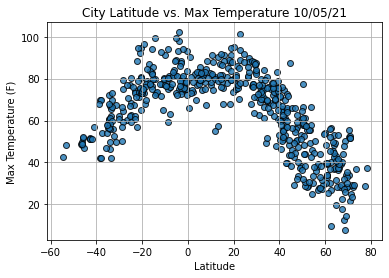

In [25]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

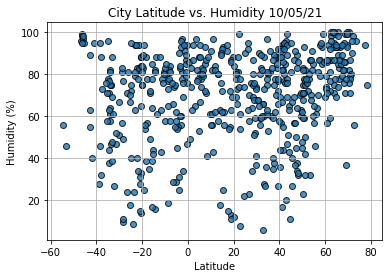

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

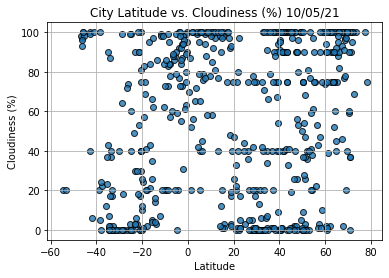

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

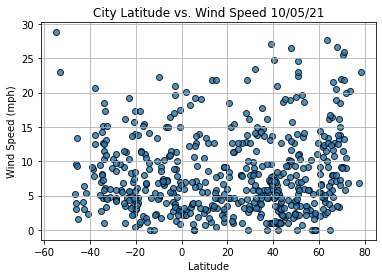

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [30]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [32]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

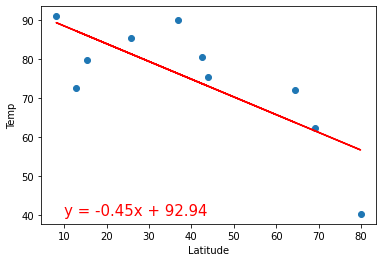

In [33]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [35]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

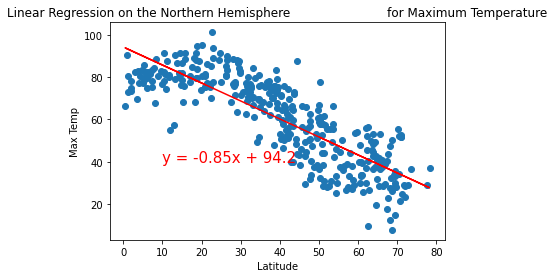

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

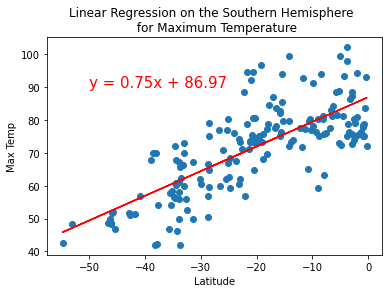

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere  \n for Maximum Temperature', 'Max Temp',(-50,90))

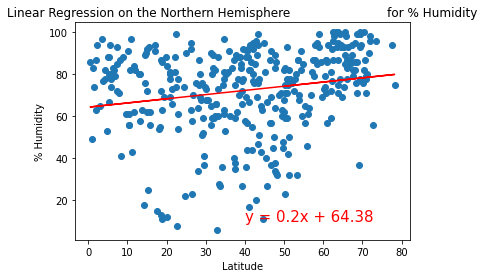

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

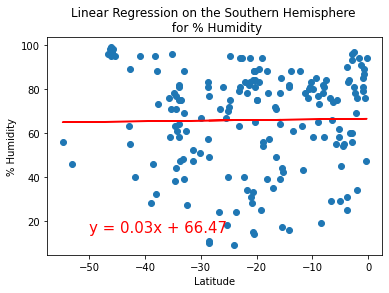

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

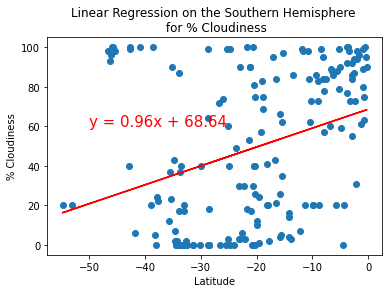

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

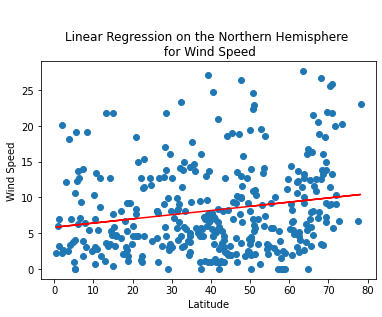

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

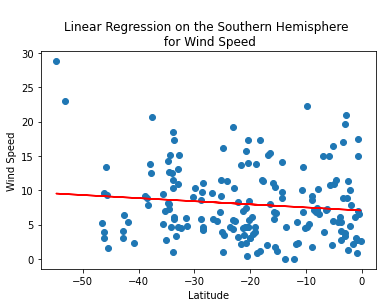

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))